# ЛР 1. Введение. Инструменты python для базовых задач МО.

## Библиотеки

In [1]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression #пробуем обучить стандартную модель регрессии из ЛР1 

# Задания

## 1.

### 1. Изучите подробно формулы. Попрактикуйтесь самостоятельно в их выводе.

1). Если функция $f(\overline{x}) = \overline{a}^{T} \cdot\overline{x}$, то $f'(\overline{x}) = \overline{a} $. Где $\overline{x},\overline{a} $ - вектор столбцы.

2).  Если функция $f(\overline{x}) = \overline{x}^{T} A\overline{x}$, то $f'(\overline{x}) = (A+A^{T})\overline{x} $. Где $\overline{x}$ - вектор столбец, $A$ - квадратная матрица соответсвующего размера.

$f(\overline{x}) = \overline{x}^{T} A\overline{x}$, то $f'(\overline{x}) = (A+A^{T})\overline{x} $.

$\overline{x}^{T} A = \left( \sum_{i = 1}^{n} x_i a_{1i} \quad \sum_{i = 1}^{n} x_i a_{2i} \quad \dots \quad \sum_{i = 1}^{n} x_i a_{ni} \right)$.

$\overline{x}^{T} A\overline{x} = x_1 \sum_{i = 1}^{n} x_i a_{1i} + x_2 \sum_{i = 1}^{n} x_i a_{2i} + \dots + x_n \sum_{i = 1}^{n} x_i a_{ni} = \sum_{j = 1}^{n} \sum_{i = 1}^{n} $.

$\dfrac{\partial f}{\partial x_k} = \sum_{i = 1}^{n} a_{ki} x_i + \sum_{i = 1}^{n} a_{ik} x_i = A \overline{x} + A \overline{x}^{T}$.

### 2. Получите ещё 2 любых формулы для подобного матричного или векторного дифференцирования. Вывод формул кратко оформите в документе.

$1) \quad \alpha = \overline{y}^{T} \overline{x}.$

$\overline{y}^{T} \overline{x} = \sum_{i = 1}^{n} y_i x_i$

$\dfrac{\partial \alpha}{\partial z_k} = \sum_{i = 1}^{n} y_i \frac{\partial x_i}{\partial z_k} + \sum_{i = 1}^{n} x_i \frac{\partial y_i}{\partial z_k} = \overline{y}^{T} \frac{\partial x}{\partial z} + \overline{x}^{T} \frac{\partial y}{\partial z}$

$2) \quad \alpha = \overline{y}^{T} A \overline{x}$.

$\overline{w}^{T} = \overline{y}^{T} A$.

$\alpha = \overline{w}^{T} \overline{x}$.

$\dfrac{\partial \alpha}{\partial z_k} = \overline{x}^{T} \frac{\partial w}{\partial z} + \overline{w}^{T} \frac{\partial x}{\partial z} = \overline{x}^{T} A^T \frac{\partial y}{\partial z} + \overline{y}^{T} A \frac{\partial x}{\partial z}$

### 3. Проверьте справедливость полученных вами формул с помощью встроенных функций пакета numdifftools.

In [2]:
A = np.random.randint(10, size = (10, 10))
A

array([[3, 7, 6, 6, 0, 5, 9, 0, 5, 0],
       [8, 7, 2, 8, 9, 6, 6, 4, 7, 5],
       [5, 9, 5, 0, 1, 2, 5, 7, 7, 6],
       [2, 2, 5, 4, 7, 8, 7, 5, 5, 0],
       [7, 7, 1, 5, 8, 1, 3, 1, 6, 7],
       [7, 2, 6, 7, 0, 3, 5, 5, 2, 4],
       [8, 8, 3, 6, 5, 7, 8, 2, 4, 0],
       [0, 5, 6, 1, 7, 9, 8, 4, 8, 0],
       [6, 7, 5, 3, 0, 1, 3, 6, 5, 0],
       [2, 3, 5, 3, 3, 0, 9, 6, 5, 1]])

In [3]:
def func(x, y): 
    return np.dot(np.dot(y.T, A), x)

In [4]:
x0 = np.arange(0, 10)
x0

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
y0 = np.arange(0, 10)
y0

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
grad = nd.Gradient(func)(x0, y0)
grad

array([201., 235., 206., 169., 170., 166., 283., 204., 235.,  74.])

In [7]:
np.dot(y0.T, A)

array([201, 235, 206, 169, 170, 166, 283, 204, 235,  74])

## 2.

### Теория

RandomState exposes a number of methods for generating random numbers drawn from a variety of probability distributions.

Random seed in $np.random.RandomState(Seed)$ is used to initialize the pseudo-random number generator. Can be any integer between 0 and 2**32 - 1 inclusive, an array (or other sequence) of such integers, or None (the default). If seed is None, then RandomState will try to read data from /dev/urandom (or the Windows analogue) if available or seed from the clock otherwise.

$LinearRegression(fit\_intercept=True)$ Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

### Коэффициент детерминации

In [65]:
def get_det_coeff(y, Y):
    return 1 - np.dot(y - Y, (y - Y).T) / np.dot(y - np.mean(y), (y - np.mean(y)).T)

### 2. Реализуйте функции для работы регрессии по произвольному базису самостоятельно (используйте только базовые функции и numpy), используя формулы, полученные выше. Используйте матричные вычисления!

In [3]:
def get_Q(x, poly_deg):
    X = x[:, np.newaxis]
    from sklearn.preprocessing import PolynomialFeatures
    poly_reg = PolynomialFeatures(degree=4)
    return poly_reg.fit_transform(X)

In [4]:
def get_weights(x, y, poly_deg):
    Q = get_Q(x, poly_deg)
    return np.dot(np.dot(np.linalg.inv(np.dot(Q.T, Q)), Q.T), y)

### 3. Попрактикуйте модели и вашу и встроенную на разных искусственных данных.

In [11]:
rng = np.random.RandomState(1) # задаём искусственные данные
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
n = 4

In [12]:
x_test = np.linspace(np.min(x), np.max(x), 50)
y_test = np.sin(x_test) + 0.1 * rng.randn(50)

In [13]:
Y = np.dot(get_weights(x, y, n), get_Q(x_test, n).T)

In [14]:
Y

array([-0.19352209,  0.1950907 ,  0.49401596,  0.71291842,  0.8610267 ,
        0.94713332,  0.97959467,  0.96633103,  0.91482656,  0.83212932,
        0.72485122,  0.59916809,  0.46081964,  0.31510943,  0.16690494,
        0.02063754, -0.11969756, -0.25054122, -0.36877044, -0.47169833,
       -0.5570741 , -0.62308311, -0.66834681, -0.69192277, -0.69330468,
       -0.67242234, -0.62964167, -0.56576471, -0.4820296 , -0.3801106 ,
       -0.26211811, -0.13059862,  0.01146526,  0.1606548 ,  0.31311516,
        0.46455537,  0.61024837,  0.74503095,  0.86330382,  0.95903156,
        1.02574261,  1.05652934,  1.04404797,  0.98051861,  0.85772527,
        0.66701583,  0.39930206,  0.0450596 , -0.40567199, -0.96328931])

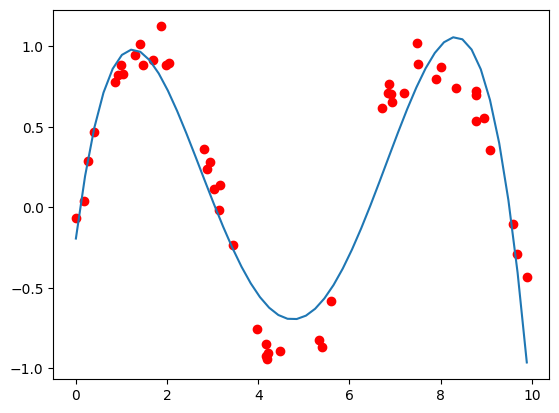

In [15]:
plt.scatter(x, y, c ='red')
plt.plot(x_test, Y)

In [16]:
get_det_coeff(y_test, Y)

0.9117447361003214

In [41]:
rng = np.random.RandomState(1) # задаём искусственные данные
x = 10 * rng.rand(50)
y = np.tan(x) + 0.1 * rng.randn(50)
n = 4

In [44]:
x_test = np.linspace(np.min(x), np.max(x), 50)
y_test = np.tan(x_test) + 0.1 * rng.randn(50)

In [45]:
Y = np.dot(get_weights(x, y, n), get_Q(x_test, n).T)

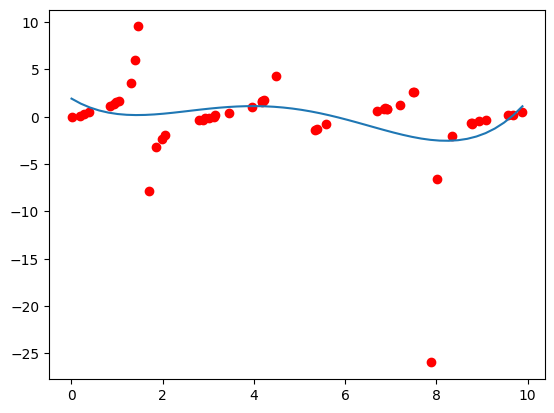

In [46]:
plt.scatter(x, y, c ='red')
plt.plot(x_test, Y,)

In [47]:
get_det_coeff(y_test, Y)

0.031190427132617105

In [32]:
rng = np.random.RandomState(1) # задаём искусственные данные
x = 10 * rng.rand(50)
y = np.cos(x) + 0.1 * rng.randn(50)
n = 3

In [37]:
x_test = np.linspace(np.min(x), np.max(x), 50)
y_test = np.cos(x_test) + 0.1 * rng.randn(50)

In [38]:
Y = np.dot(get_weights(x, y, n), get_Q(x_test, n).T)

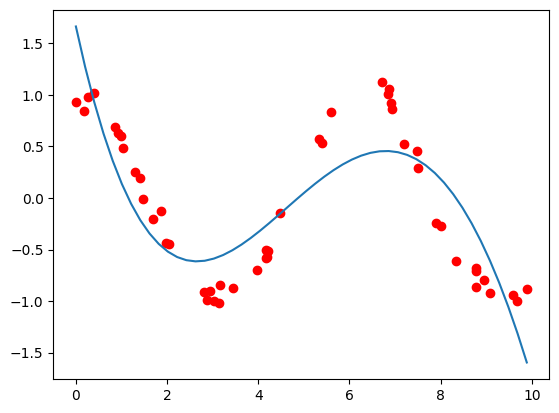

In [39]:
plt.scatter(x, y, c ='red')
plt.plot(x_test, Y)

In [40]:
get_det_coeff(y_test, Y)

0.7342205684326903

### 4. Постройте модели (встроенную и вашу) для прогнозирования веса рыбы из файла Fish.csv. Попробуйте различные базисы, различные комбинации фич и постарайтесь повысить точность прогноза.

In [59]:
dataframe = pd.read_csv("Fish.csv") # загружаем данные
dataframe.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [60]:
X = dataframe.drop(["Species","Weight"], axis=1).values # выбираем то, что будет фичами
y = dataframe["Weight"].values # вес будем предсказывать
n = 3

In [61]:
X;

In [62]:
y;

In [63]:
model = LinearRegression(fit_intercept=True) # модель регрессии по умолчанию будет использовать стандартный базис
model

LinearRegression()

In [64]:
model.fit(X, y)

LinearRegression()

In [65]:
model.score(X,y)

0.8852867046546207

In [66]:
def get_Q(x, poly_deg):
    # X = x[:, np.newaxis]
    from sklearn.preprocessing import PolynomialFeatures
    poly_reg = PolynomialFeatures(degree=poly_deg)
    return poly_reg.fit_transform(X)

In [67]:
Y = np.dot(get_weights(X, y, n), get_Q(X, n).T)

In [69]:
get_det_coeff(y, Y)

0.9729198291271373

### 5. Попытайтесь предсказать [Perfomance index](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression) студентов используя вашу собственную и встроенные модели с различными базисами.

In [70]:
dataframe = pd.read_csv("Student_Performance.csv") # загружаем данные
dataframe.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [71]:
X = dataframe.drop(["Extracurricular Activities","Performance Index"], axis=1).values # выбираем то, что будет фичами
y = dataframe["Performance Index"].values # вес будем предсказывать
n = 3

In [72]:
X;

In [73]:
y;

In [74]:
model = LinearRegression(fit_intercept=True) # модель регрессии по умолчанию будет использовать стандартный базис
model

LinearRegression()

In [75]:
model.fit(X, y)

LinearRegression()

In [76]:
model.score(X,y)

0.9884981216772581

In [77]:
def get_Q(x, poly_deg):
    # X = x[:, np.newaxis]
    from sklearn.preprocessing import PolynomialFeatures
    poly_reg = PolynomialFeatures(degree=poly_deg)
    return poly_reg.fit_transform(X)

In [78]:
Y = np.dot(get_weights(X, y, n), get_Q(X, n).T)

In [79]:
get_det_coeff(y, Y)

0.9885476999953138

### 6. Подумайте, как повлияет на модель использование слишком большого количества базисных фич.

Все сломается.

### 7. В примере выше мы тестируем полученную модель на тех же данных, что и обучаем. В целом это не очень хорошо. Разделите изначальные данные на обучающую и тестовую выборку и повторите вычисления точности.

In [51]:
rng = np.random.RandomState(1) # задаём искусственные данные
n = 4

In [2]:
from sklearn.model_selection import train_test_split

In [82]:
x = 10 * rng.rand(50)
x_train, x_test = train_test_split(x)

In [83]:
shape1, shape2 = x_train.shape[0], x_test.shape[0]
y_train = np.sin(x_train) + 0.1 * rng.randn(shape1)
y_test = np.sin(x_test) + 0.1 * rng.randn(shape2)

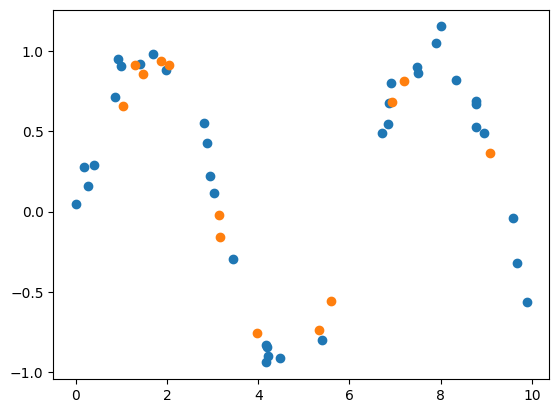

In [84]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)

In [85]:
def get_Q(x, poly_deg):
    X = x[:, np.newaxis]
    from sklearn.preprocessing import PolynomialFeatures
    poly_reg = PolynomialFeatures(degree=4)
    return poly_reg.fit_transform(X)

In [86]:
w = get_weights(x_train, y_train, n)

In [87]:
Y_train_predicted = np.dot(get_weights(x_train, y_train, n), get_Q(x_test, n).T)

In [88]:
Y_train_predicted.shape

(13,)

In [89]:
x_train.shape

(37,)

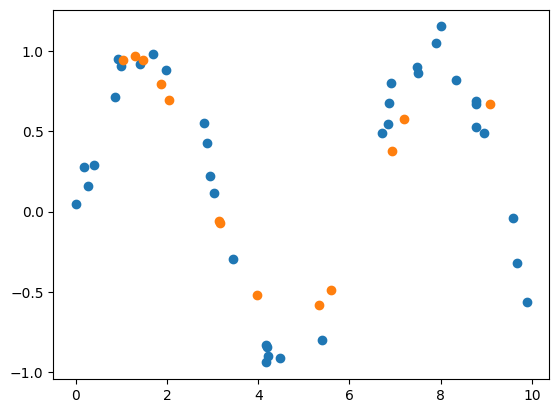

In [90]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, Y_train_predicted)

In [11]:
dataframe = pd.read_csv("Fish.csv") # загружаем данные
dataframe.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [66]:
X = dataframe.drop(["Species","Weight"], axis=1).values # выбираем то, что будет фичами
y = dataframe["Weight"].values # вес будем предсказывать
n = 4

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((127, 5), (127,), (32, 5), (32,))

In [69]:
def get_Q(x, poly_deg):
    # X = x[:, np.newaxis]
    from sklearn.preprocessing import PolynomialFeatures
    poly_reg = PolynomialFeatures(degree=poly_deg)
    return poly_reg.fit_transform(X)

In [74]:
Q_old = get_Q(x_train, n)
np.dot(Q_old.T, Q_old)
(np.linalg.inv(np.dot(Q_old.T, Q_old)) @ Q_old.T) @ y_train

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 127 is different from 159)

In [72]:
y_train.shape

(127,)

In [53]:
def get_weights(x, y, poly_deg):
    Q = get_Q(x, poly_deg)
    return np.dot(np.dot(np.linalg.inv(np.dot(Q.T, Q)), Q.T), y)

In [54]:
W = get_weights(x_train, y_train, n)

ValueError: shapes (126,159) and (127,1,1) not aligned: 159 (dim 1) != 1 (dim 1)

In [55]:
X_NEW = get_Q(x_test, n)

In [40]:
Y_predicted = np.dot(W, X_NEW.T)

NameError: name 'W' is not defined

In [24]:
get_det_coeff(y_test, Y_predicted)

NameError: name 'get_det_coeff' is not defined